#Prediction of  Loan Approval in Banks Using Machine Learning

1. Importing Required Libraries and Utilities

In [ ]:
import numpy as np #numerical calculation
import pandas as pd # data manipulation
import seaborn as sns #plotting

import matplotlib.pyplot as plt #plotting

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split # for splitting into train and test data
from sklearn.datasets import make_classification


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report,confusion_matrix #to make classification report, confusion matrix
from sklearn.metrics import roc_curve, auc
from sklearn import metrics

from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Nicy_Data_Science/loan_approval_dataset.csv

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[Errno 20] Not a directory: '/content/drive/MyDrive/Nicy_Data_Science/loan_approval_dataset.csv'
/content


2. Loading Dataset to a data frame

In [ ]:
loan_approval_dataframe = pd.read_csv("/content/drive/MyDrive/Nicy_Data_Science/loan_approval_dataset.csv")


In [ ]:
loan_approval_dataframe

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


3. Exploratory Data Analysis (EDA)

3.1. Data cleaning

In [ ]:
loan_approval_dataframe.shape

(4269, 13)

In [ ]:
loan_approval_dataframe.duplicated(keep=False).sum() # check for presence of any duplicate values

0

In [ ]:
loan_approval_dataframe.columns # getting the names of columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [ ]:
loan_approval_dataframe.info()   # getting a concise summary of the dataframe


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [ ]:
loan_approval_dataframe.nunique() # checking number of unique values for each feature

loan_id                      4269
 no_of_dependents               6
 education                      2
 self_employed                  2
 income_annum                  98
 loan_amount                  378
 loan_term                     10
 cibil_score                  601
 residential_assets_value     278
 commercial_assets_value      188
 luxury_assets_value          379
 bank_asset_value             146
 loan_status                    2
dtype: int64

In [ ]:
#Dropping undesired attributes - 'loan id' from dataset -as it is not needed for analysis

#loan_approval_dataframe.drop(columns=['loan_id'], inplace=True)
loan_approval_dataframe = loan_approval_dataframe.drop(['loan_id'], axis=1)
loan_approval_dataframe.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [ ]:
# Stripping off leading white spaces from column names
loan_approval_dataframe.columns = [col.strip() for col in loan_approval_dataframe.columns]

In [ ]:
loan_approval_dataframe.columns # checking column names

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status'],
      dtype='object')

3.2 Data Visualization and Feature Engineering

In [ ]:
loan_approval_dataframe.select_dtypes(include='object').nunique() # finding columns with non-numerical(object) values

education        2
self_employed    2
loan_status      2
dtype: int64

In [ ]:
count_loan_status = loan_approval_dataframe['loan_status'].value_counts()
print(count_loan_status)

 Approved    2656
 Rejected    1613
Name: loan_status, dtype: int64


In [ ]:
count_education = loan_approval_dataframe ['education'].value_counts()
print(count_education)

 Graduate        2144
 Not Graduate    2125
Name: education, dtype: int64


In [ ]:
count_self_employed = loan_approval_dataframe ['self_employed'].value_counts()
print(count_self_employed)

 Yes    2150
 No     2119
Name: self_employed, dtype: int64


In [ ]:
##change categorical values to numerical values
# Apply label encoding to columns with non-numerical(object) values

columns_to_encode = ['education','self_employed','loan_status']
loan_approval_dataframe[columns_to_encode] = loan_approval_dataframe[columns_to_encode].apply(LabelEncoder().fit_transform)
#loan_approval_dataframe['education','self_employed','loan_status'] = label_encoder.fit_transform(loan_approval_dataframe['education', 'self_employed', 'loan_status'])

# Display the updated DataFrame with encoded columns
print(loan_approval_dataframe[['education', 'self_employed','loan_status']])

      education  self_employed  loan_status
0             0              0            0
1             1              1            1
2             0              0            1
3             0              0            1
4             1              1            1
...         ...            ...          ...
4264          0              1            1
4265          1              1            0
4266          1              0            1
4267          1              0            0
4268          0              0            0

[4269 rows x 3 columns]


In [ ]:
count_EN_loan_status = loan_approval_dataframe['loan_status'].value_counts()
print(count_loan_status)
print(count_EN_loan_status)

 Approved    2656
 Rejected    1613
Name: loan_status, dtype: int64
0    2656
1    1613
Name: loan_status, dtype: int64


In [ ]:
count_EN_education = loan_approval_dataframe['education'].value_counts()
print(count_education)
print(count_EN_education)

 Graduate        2144
 Not Graduate    2125
Name: education, dtype: int64
0    2144
1    2125
Name: education, dtype: int64


In [ ]:
count_EN_self_employed = loan_approval_dataframe['self_employed'].value_counts()
print(count_self_employed)
print(count_EN_self_employed)

 Yes    2150
 No     2119
Name: self_employed, dtype: int64
1    2150
0    2119
Name: self_employed, dtype: int64


In [ ]:
loan_approval_dataframe.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1


In [ ]:
loan_approval_dataframe.shape

(4269, 12)

In [ ]:
loan_approval_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   no_of_dependents          4269 non-null   int64
 1   education                 4269 non-null   int64
 2   self_employed             4269 non-null   int64
 3   income_annum              4269 non-null   int64
 4   loan_amount               4269 non-null   int64
 5   loan_term                 4269 non-null   int64
 6   cibil_score               4269 non-null   int64
 7   residential_assets_value  4269 non-null   int64
 8   commercial_assets_value   4269 non-null   int64
 9   luxury_assets_value       4269 non-null   int64
 10  bank_asset_value          4269 non-null   int64
 11  loan_status               4269 non-null   int64
dtypes: int64(12)
memory usage: 400.3 KB


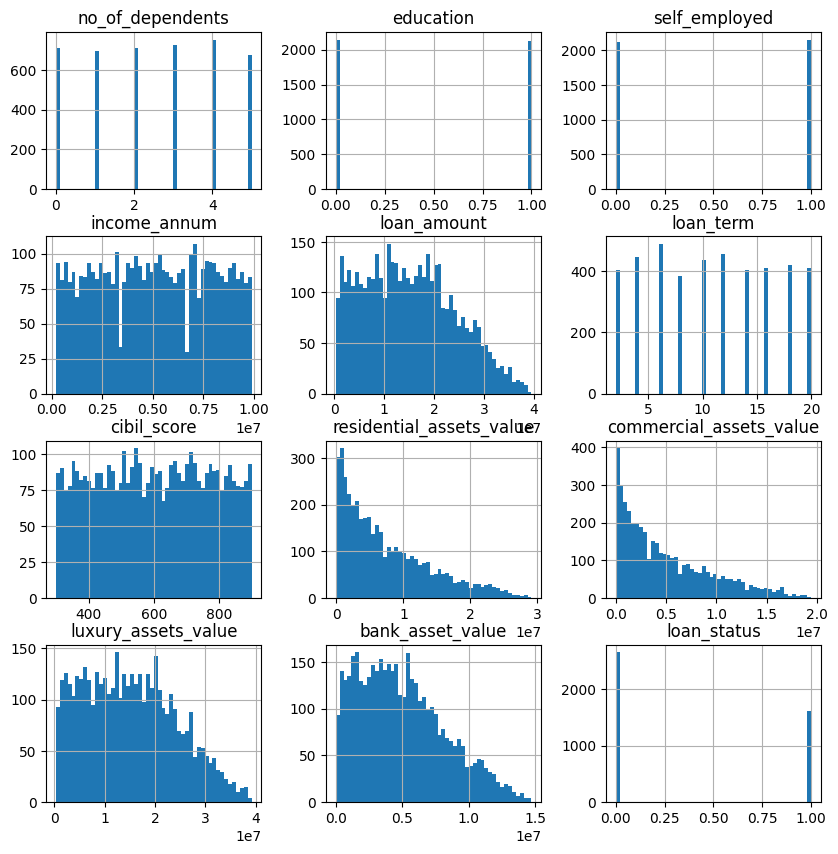

In [ ]:
#Plotting count graphs to visualize the data count
loan_approval_dataframe.hist(bins=50,figsize=(10,10))
plt.show()

<Axes: >

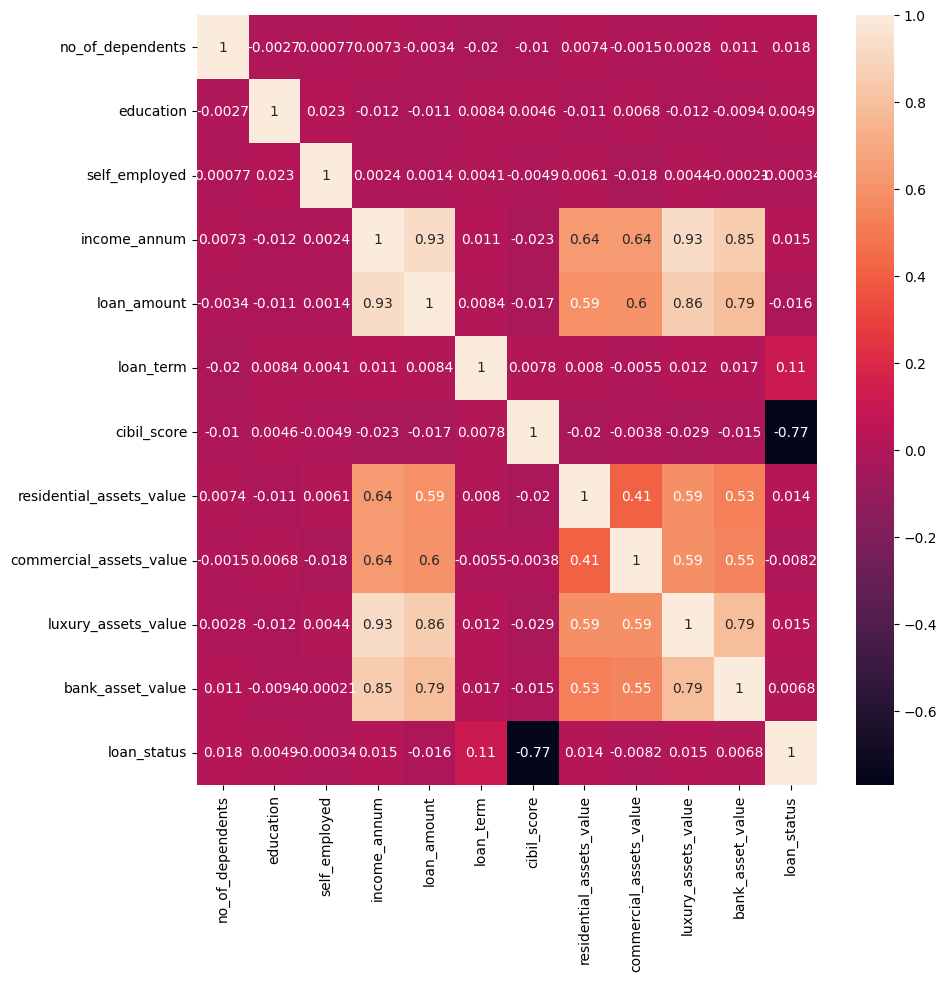

In [ ]:
#Correlation Analysis
#Heat map for understanding the correlation between the variables
plt.figure(figsize=(10,10))
sns.heatmap(loan_approval_dataframe.corr(), annot=True)

In [ ]:
#Using standard scaler to standardize and rescale the values of input attributes
X = loan_approval_dataframe.drop(['loan_status'], axis = 1) # Separating input variables from output variables

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X) #scaling input variables
#X = scaler.transform(X)
#print(X)

StandardScaler()

In [ ]:
X = scaler.transform(X)
print(X)

[[-0.2941017  -0.99555917 -1.00728821 ...  2.877289    0.83202837
   0.93030441]
 [-1.4735476   1.00446064  0.99276452 ... -0.63192107 -0.69499321
  -0.51593638]
 [ 0.29562125 -0.99555917 -1.00728821 ... -0.10781827  1.99651964
   2.40731629]
 ...
 [-0.2941017   1.00446064 -1.00728821 ...  1.69236092  0.3266831
   0.71490685]
 [-0.88382465  1.00446064 -1.00728821 ... -0.97372725 -0.11274758
   0.25334064]
 [-0.88382465 -0.99555917 -1.00728821 ...  1.55563845  2.26017804
   2.16114764]]


In [ ]:
#Check Values for Target Variable - RainToday
#counting target variable
count = loan_approval_dataframe['loan_status'].value_counts()
print(count)

0    2656
1    1613
Name: loan_status, dtype: int64


Text(0.5, 1.0, 'Count of Values of Original Target Variable')

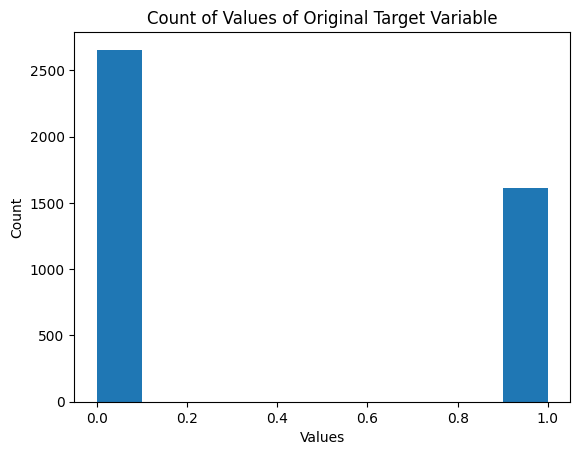

In [ ]:
#Plotting target variable separately
plt.hist(loan_approval_dataframe['loan_status'])
plt.xlabel('Values')
plt.ylabel('Count')
plt.title('Count of Values of Original Target Variable')

In [ ]:
y = loan_approval_dataframe['loan_status'] # renaming the target column

4.1 Spliting the dataset for training and testing.

4.2  Over sampling the training dataset using the Random Over Sampler, SMOTE

[(0, 2120), (1, 2120)]


Text(0.5, 1.0, 'Count of Values of Oversampled Target Variable')

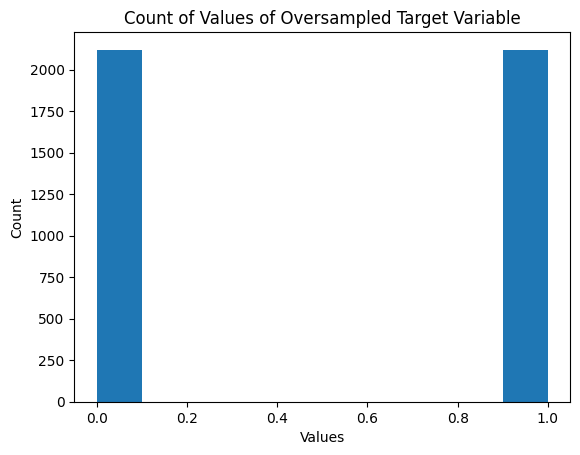

In [ ]:
#Performing Random oversampling to transform unbalanced data to balanced
from imblearn.over_sampling import RandomOverSampler, SMOTE
#from imblearn.under_sampling import RandomUnderSampler, NearMiss
from collections import Counter

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a Random OverSampler
ros = RandomOverSampler(random_state=50)

# random oversampling on the training data
X_train, y_train = ros.fit_resample(X_train, y_train)

#  Printing the balanced classes for X_train and y_train
print(sorted(Counter(y_train).items()))

#plotting the oversampled training set of target variable which is stored in the y_train
plt.hist(y_train)
plt.xlabel('Values')
plt.ylabel('Count')
plt.title('Count of Values of Oversampled Target Variable')

In [ ]:
#plotting the oversampled training set of target variable which is stored in the y_train
#plt.hist(y_train)

5. Building Machine Learning Models

   1. Naive Bayes
   2. Logistic Regression
   3. Decision Tree Classifier
   4. Random Forest Classifier

1. Naive Bayes Classification

In [ ]:
from sklearn.naive_bayes import GaussianNB
NB_clsfier = GaussianNB()
NB_clsfier.fit(X_train,y_train)

GaussianNB()

In [ ]:
train_accuracy = NB_clsfier.score(X_train,y_train) ####
train_accuracy

0.9492924528301887

In [ ]:
test_accuracy = NB_clsfier.score(X_test, y_test)
test_accuracy

0.9414519906323185

[[490  46]
 [  4 314]]




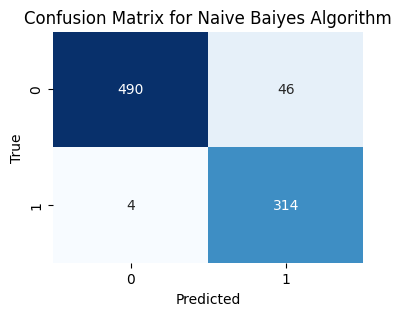

              precision    recall  f1-score   support

           0       0.99      0.91      0.95       536
           1       0.87      0.99      0.93       318

    accuracy                           0.94       854
   macro avg       0.93      0.95      0.94       854
weighted avg       0.95      0.94      0.94       854



In [ ]:
predictions_NB = NB_clsfier.predict(X_test)
print(confusion_matrix(y_test,predictions_NB))

confusion_matrix_NB = confusion_matrix(y_test,predictions_NB)
confusion_matrix_NB
print('\n')
#sns.heatmap(confusion_matrices, annot=True)

# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix_NB, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for Naive Baiyes Algorithm")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

print(classification_report(y_test,predictions_NB))

2. Logistic regression

In [ ]:
# Train Logistic Regression classifier on the training split
from sklearn.linear_model import LogisticRegression

logreg_clsfier = LogisticRegression(solver="lbfgs", random_state=42, max_iter=1000)
logreg_clsfier.fit(X_train, y_train)
# Evaluate performance on the test split


LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
train_accuracy = logreg_clsfier.score(X_train, y_train)
train_accuracy

0.9278301886792453

In [ ]:
test_accuracy = logreg_clsfier.score(X_test, y_test)
test_accuracy
#print("accuracy: %.4f" % (test_accuracy))  #*100)

0.9110070257611241

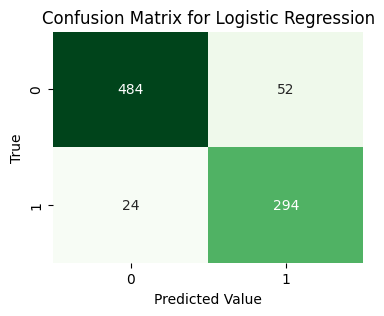

              precision    recall  f1-score   support

           0       0.95      0.90      0.93       536
           1       0.85      0.92      0.89       318

    accuracy                           0.91       854
   macro avg       0.90      0.91      0.91       854
weighted avg       0.91      0.91      0.91       854



In [ ]:
predictions_LR = logreg_clsfier.predict(X_test)
confusion_matrices = confusion_matrix(y_test,predictions_LR)
confusion_matrices
print('\n')

# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrices, annot=True, fmt="d", cmap="Greens", cbar=False)
plt.title("Confusion Matrix for Logistic Regression")
plt.xlabel("Predicted Value")
plt.ylabel("True")
plt.show()

print(classification_report(y_test,predictions_LR))

3. Decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

DT_clsfier = DecisionTreeClassifier()
DT_clsfier.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
train_accuracy = DT_clsfier.score(X_train, y_train)
train_accuracy

1.0

In [ ]:
test_accuracy = DT_clsfier.score(X_test, y_test)
test_accuracy

0.9695550351288056

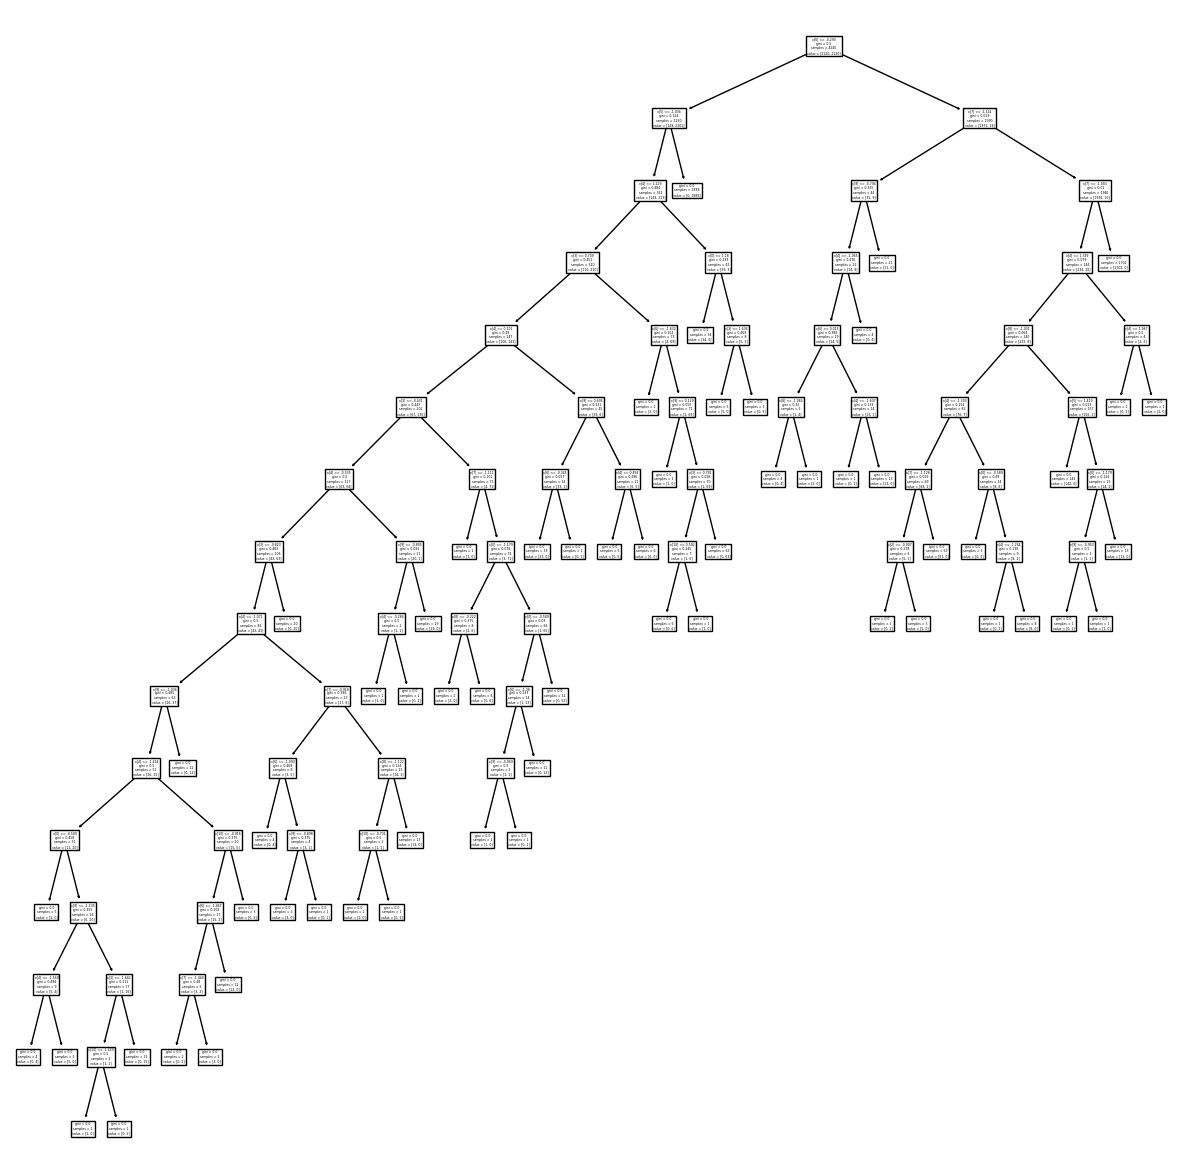

In [ ]:
# plotting the tree
from sklearn import tree

plt.figure(figsize=(15,15))
tree.plot_tree(DT_clsfier)
plt.show()

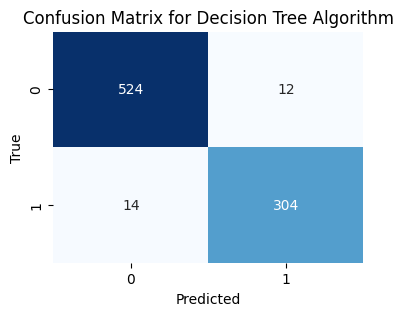

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       536
           1       0.96      0.96      0.96       318

    accuracy                           0.97       854
   macro avg       0.97      0.97      0.97       854
weighted avg       0.97      0.97      0.97       854



In [ ]:
# Creating a Classification report for better understanding of precision
predictions_DT = DT_clsfier.predict(X_test)
confusion_matrices = confusion_matrix(y_test,predictions_DT)
confusion_matrices
print('\n')

# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrices, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for Decision Tree Algorithm")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

print(classification_report(y_test,predictions_DT))

 4. Random Forest classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_forest_clf = RandomForestClassifier()

random_forest_clf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
train_accuracy = random_forest_clf.score(X_train, y_train)
train_accuracy

1.0

In [ ]:
test_accuracy = random_forest_clf.score(X_test, y_test)
test_accuracy

0.977751756440281

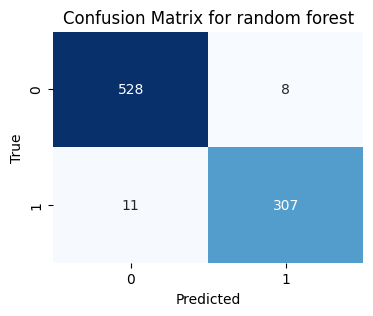

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       536
           1       0.97      0.97      0.97       318

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



In [ ]:
predictions_rf = random_forest_clf.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
confusion_matrix_rf = confusion_matrix(y_test,predictions_rf)
confusion_matrix_rf
print('\n')
#sns.heatmap(confusion_matrices, annot=True)

# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix_rf, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for random forest")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

print(classification_report(y_test,predictions_rf))

6. Comparison Machine Learning Models.

  1. Decision Tree Classifier
  2. Naive Bayes
  3. Logistic Regression
  4. Random Forest Classifier

6.1. Generating ROC curves to compare accuracy of different machine learning models used.

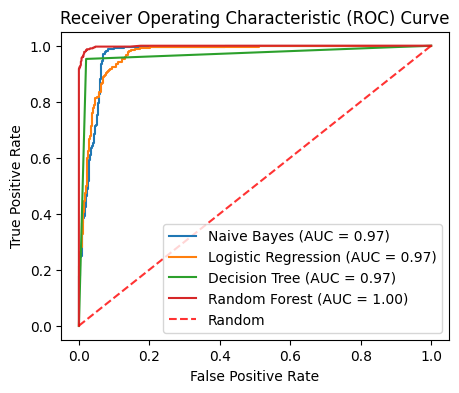

In [ ]:
#compare results

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve, auc

# Create classifiers
classifiers = {
    'Naive Bayes' : GaussianNB(),
    'Logistic Regression': LogisticRegression(solver="lbfgs", random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest' : RandomForestClassifier()
}

# Plot ROC curves for each classifier
plt.figure(figsize=(5, 4))

for name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    score_y_val = classifier.predict_proba(X_test)[:, 1]
    false_pos_rate, true_pos_rate, _ = roc_curve(y_test, score_y_val)
    auc_of_roc = auc(false_pos_rate, true_pos_rate)

    plt.plot(false_pos_rate, true_pos_rate, label=f'{name} (AUC = {auc_of_roc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random', alpha=0.8)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

6.2 Comparing Train and test accuracies of different models built

In [ ]:
#import pandas as pd

test_accuracies = []
train_accuracies = []

for name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    train_accuracy = classifier.score(X_train, y_train)
    test_accuracy = classifier.score(X_test, y_test)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Create a DataFrame to display the results as a table
results_df = pd.DataFrame({
    'Classifier': classifiers.keys(),
    'Train Accuracy': train_accuracies,
    'Test Accuracy': test_accuracies
})

print(results_df)


            Classifier  Train Accuracy  Test Accuracy
0          Naive Bayes        0.949292       0.941452
1  Logistic Regression        0.927830       0.911007
2        Decision Tree        1.000000       0.971897
3        Random Forest        1.000000       0.978923


6.3. Plotting Train and test accuracy of different models

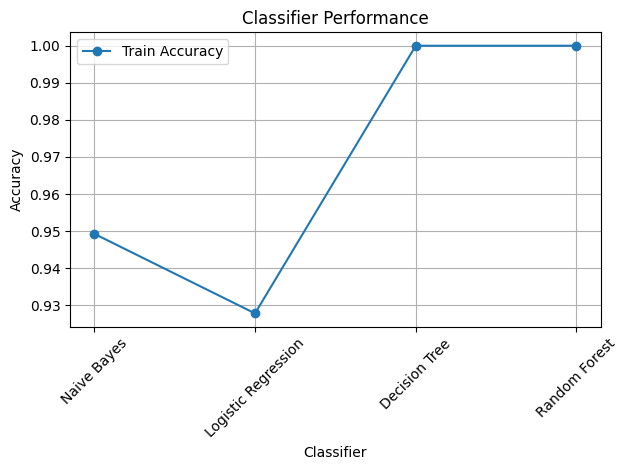

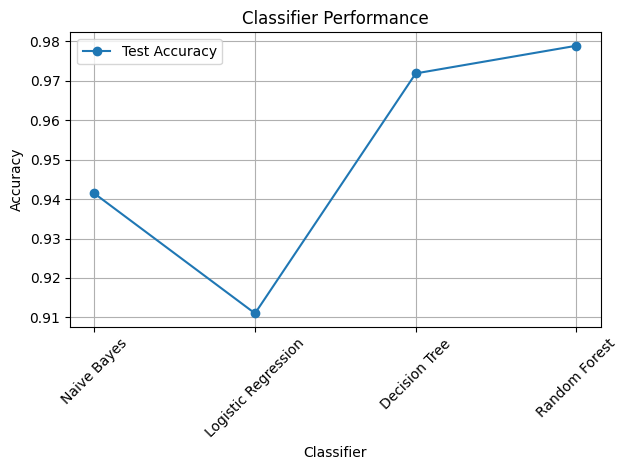

In [ ]:
#
for col in ['Train Accuracy', 'Test Accuracy']:
  plt.plot(results_df['Classifier'], results_df[col], marker='o', label=col)
  plt.title('Classifier Performance')
  plt.xlabel('Classifier')
  plt.ylabel('Accuracy')
  plt.xticks(rotation=45)
  plt.legend()
  plt.grid(True)
  plt.tight_layout()
  plt.show()
